# House Price Prediction Regression Model

# Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import StandardScaler
import xgboost

## Load Dataset

In [2]:
train_dataset = r"E:\Internships\Bharat_Intern\House_price_prediction\data\train.csv" 
test_dataset = r"E:\Internships\Bharat_Intern\House_price_prediction\data\test.csv"

df_train = pd.read_csv(train_dataset)
df_test = pd.read_csv(test_dataset)
print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)

Shape of df_train: (1460, 81)
Shape of df_test: (1459, 80)


In [3]:
pd.set_option("display.max_column", None)
pd.set_option("display.max_row", None)

In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Focused Parameters

In [5]:
df = pd.concat([df_train, df_test])
print("Shape of Intergated Data/DF: ", df.shape)

Shape of Intergated Data/DF:  (2919, 81)


In [6]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [7]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


# Information About Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [9]:
int_features = df.select_dtypes (include=["int64"]).columns
print("Total nummber of integer fetures:", int_features.shape[0])
print("Integer feature names:", int_features.tolist())

Total nummber of integer fetures: 26
Integer feature names: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [10]:
float_features= df.select_dtypes (include=["float64"]).columns
print("Total nummber of float fetures:", float_features.shape[0])
print("Float feature names:", float_features.tolist())

Total nummber of float fetures: 12
Float feature names: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [11]:
categorical_features= df.select_dtypes (include=["object"]).columns
print("Total nummber of categorical fetures:", categorical_features.shape[0])
print("Categorical feature names:", categorical_features.tolist())

Total nummber of categorical fetures: 43
Categorical feature names: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


# Get the Statistical Information of Numerical features 

In [12]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [13]:
df.describe().shape

(8, 38)

# Visulaise null/ Missing Values

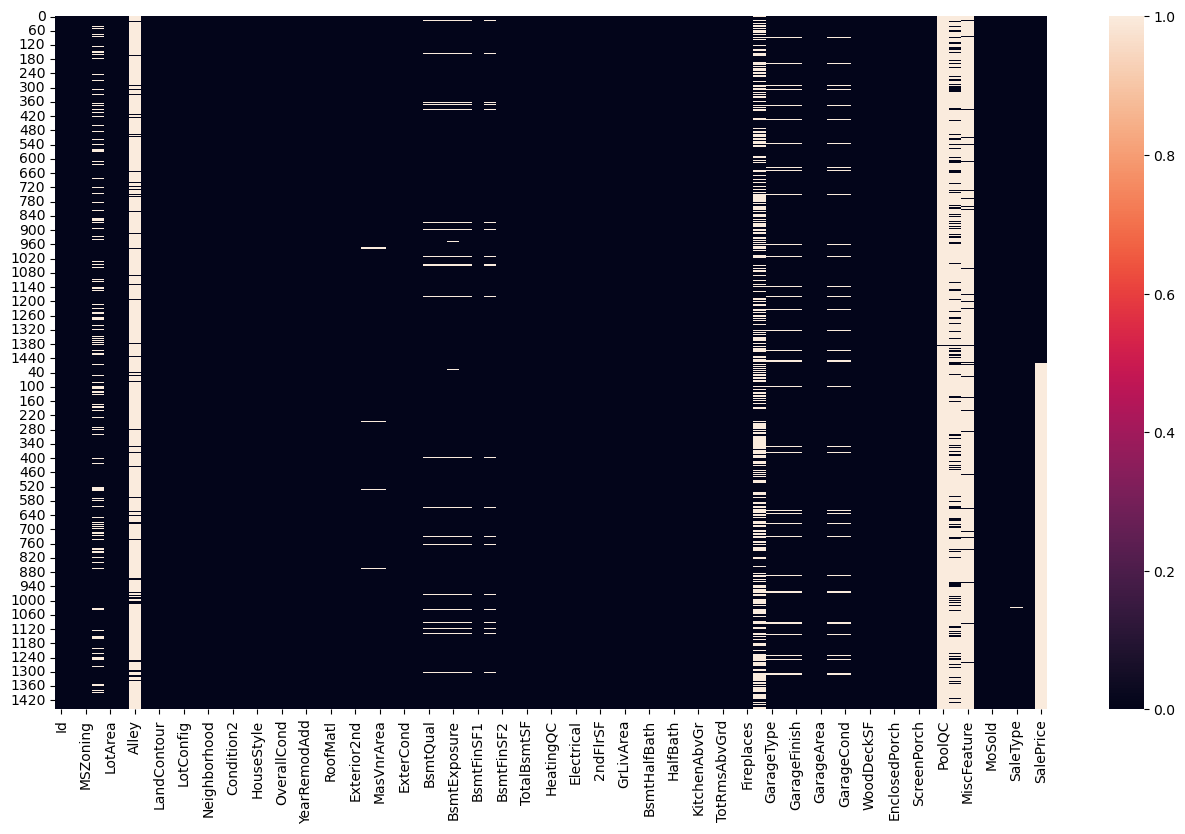

In [14]:
plt.figure(figsize = (16, 9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_dataframe_of_null_values.png")

# Get the null value percentage for every feature

In [15]:
# Set index as Id column
df = df.set_index("Id")

In [16]:
null_count = df.isnull().sum()

In [17]:
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

# Drop Column/Features

In [18]:
# As per domain knowledge we cannot remove this features Alley, PoolQC, Fence, MiscFeature instead we will replace it with constant value NA
miss_value_50_percent = null_percent[null_percent > 50]
miss_value_50_percent

Alley          93.216855
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [19]:
# As per domain knowledge we cannot remove this feature FireplaceQu instead we will replace it with constant value NA
miss_value_20_50_percent = null_percent[(null_percent >20) & (null_percent < 51)]
miss_value_20_50_percent

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [20]:
miss_value_5_20_percent = null_percent[(null_percent >5) & (null_percent < 21)]
miss_value_5_20_percent

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [21]:
df["LotFrontage"].value_counts().head()

60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: LotFrontage, dtype: int64

<Axes: ylabel='Id'>

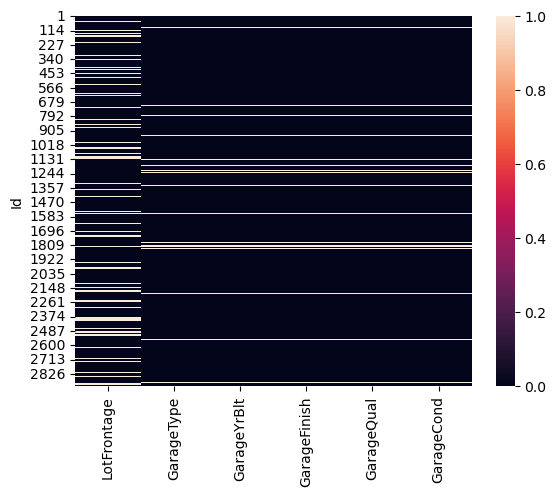

In [22]:
sns.heatmap(df[miss_value_5_20_percent.keys()].isnull())

## Missing value imputation

In [23]:
missing_value_features = null_percent[null_percent > 0]
print("Total missing value features =", len(missing_value_features))
missing_value_features

Total missing value features = 35


MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [24]:
categorical_NA_features = missing_value_features[missing_value_features.keys().isin(categorical_features)]
print("Total number of categorical features with Null values =", len(categorical_NA_features))
categorical_NA_features

Total number of categorical features with Null values = 23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [25]:
int_NA_features = missing_value_features[missing_value_features.keys().isin(int_features)]
print("Total number of integer features with Null values =", len(int_NA_features))
int_NA_features

Total number of integer features with Null values = 0


Series([], dtype: float64)

In [26]:
float_NA_features = missing_value_features[missing_value_features.keys().isin(float_features)]
print("Total number of float features with Null values =", len(float_NA_features))
float_NA_features

Total number of float features with Null values = 12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

### Before manipulating the data we must take backup of original data

In [27]:
df_manp_data = df.copy()
df_manp_data.shape

(2919, 80)

## Handling NULL values data cleaning

#### 1. MSZoning   = 0.137033

<Axes: xlabel='MSZoning', ylabel='count'>

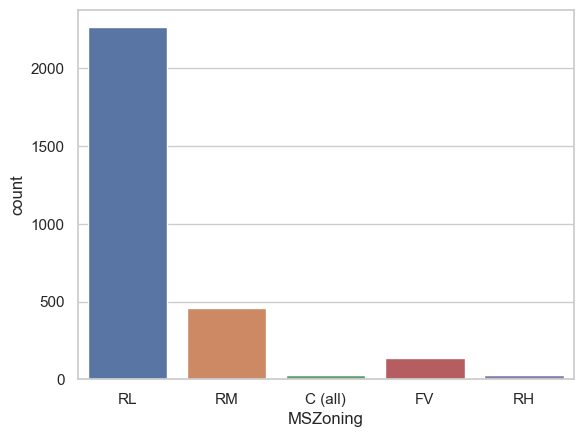

In [28]:
MSZoning_cout_analytics = df["MSZoning"].value_counts()
MSZoning_cout_analytics
sns.set_theme(style="whitegrid")
sns.countplot(x=df["MSZoning"])

In [29]:
mszoning_mode = df["MSZoning"].mode()[0]
df_manp_data["MSZoning"].replace(np.nan, mszoning_mode, inplace=True)
df_manp_data["MSZoning"].isnull().sum()

0

<Axes: xlabel='MSZoning', ylabel='count'>

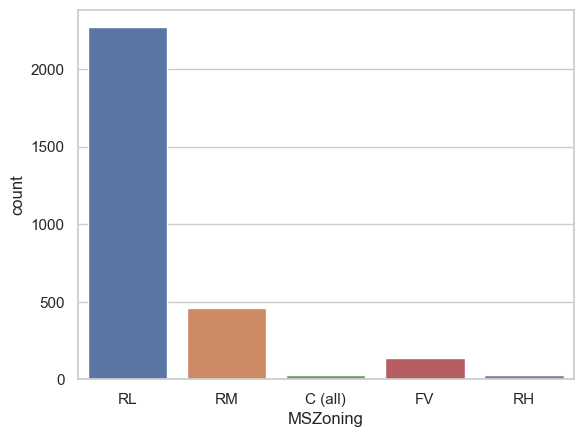

In [30]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df_manp_data["MSZoning"])

In [31]:
def oldNewCountPlot (df, df_new, feature):
    plt.subplot(121)
    sns.countplot(x=df[feature])
    plt.title("Old Data Distributed")
    plt.subplot(122)
    sns.countplot(x=df_manp_data[feature])
    plt.title("New Data Distribution")

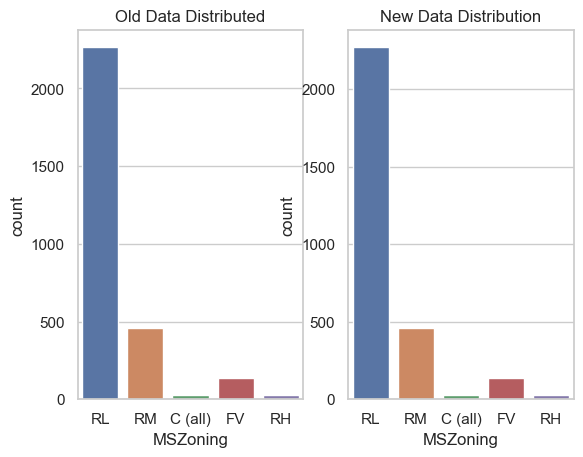

In [32]:
oldNewCountPlot(df, df_manp_data, "MSZoning")

#### 2. Alley      = 93.216855

In [33]:
df_manp_data["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [34]:
alley_constant_val = "NA"
df_manp_data["Alley"].replace(np.nan, alley_constant_val, inplace=True)
df_manp_data["Alley"].isnull().sum()

0

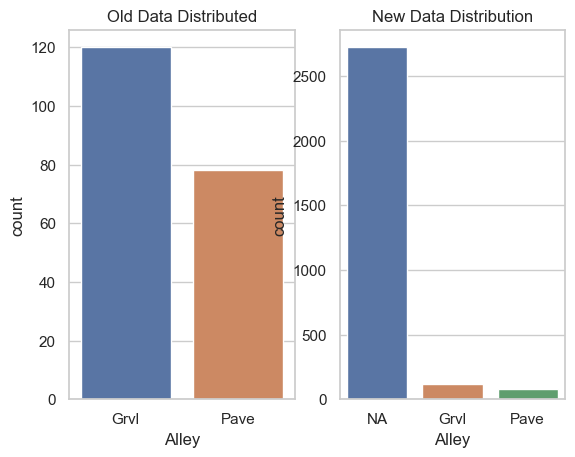

In [35]:
oldNewCountPlot(df, df_manp_data, "Alley")

#### 3. LotFrontage   = 16.649538

In [36]:
def boxHistPlot(df, figsize=(16, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(x=df)
    plt.subplot(122)
    sns.distplot(x=df)

C:\Users\Sunil Magare\AppData\Local\Temp\ipykernel_19204\3158052552.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df)


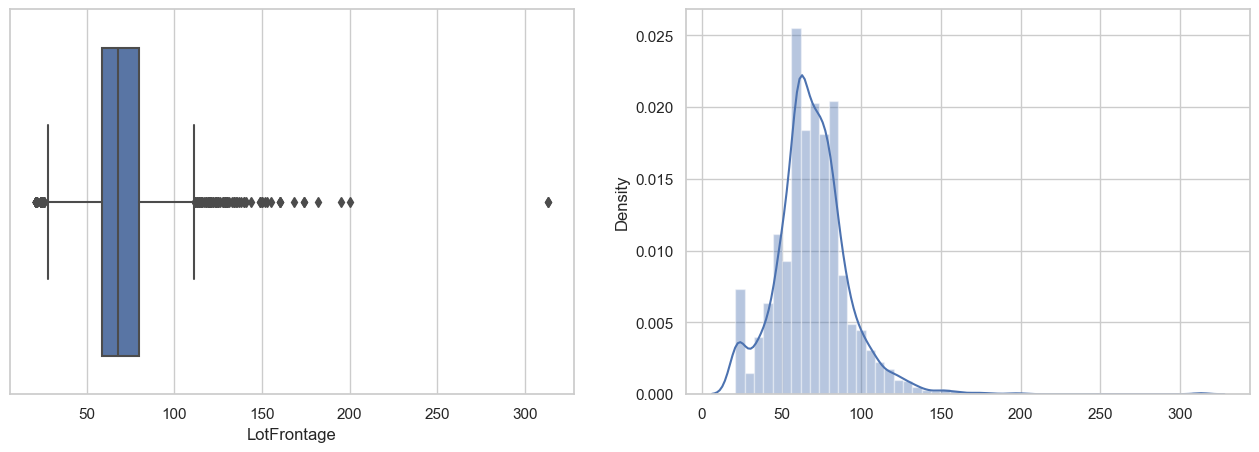

In [37]:
boxHistPlot(df["LotFrontage"])

In [38]:
lotfrontage_mean = df["LotFrontage"].mean()
df_manp_data["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace=True)
df_manp_data["LotFrontage"].isnull().sum()

0

In [39]:
def oldNewBoxHistPlot(df, df_new, feature):
    plt.figure(figsize =(16,10))
    plt.subplot(221)
    sns.boxplot(x=df[feature])
    plt.title("Old Data Distribution")
    plt.subplot(222)
    sns.distplot(x=df[feature])
    plt.title("Old Data Distribution")
    
    plt.subplot(223)
    sns.boxplot(x=df_new[feature])
    plt.title("New Data Distribution")
    plt.subplot(224)
    sns.distplot(x=df_new[feature])
    plt.title("New Data Distribution")

C:\Users\Sunil Magare\AppData\Local\Temp\ipykernel_19204\4116685424.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[feature])
C:\Users\Sunil Magare\AppData\Local\Temp\ipykernel_19204\4116685424.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_new[feature])


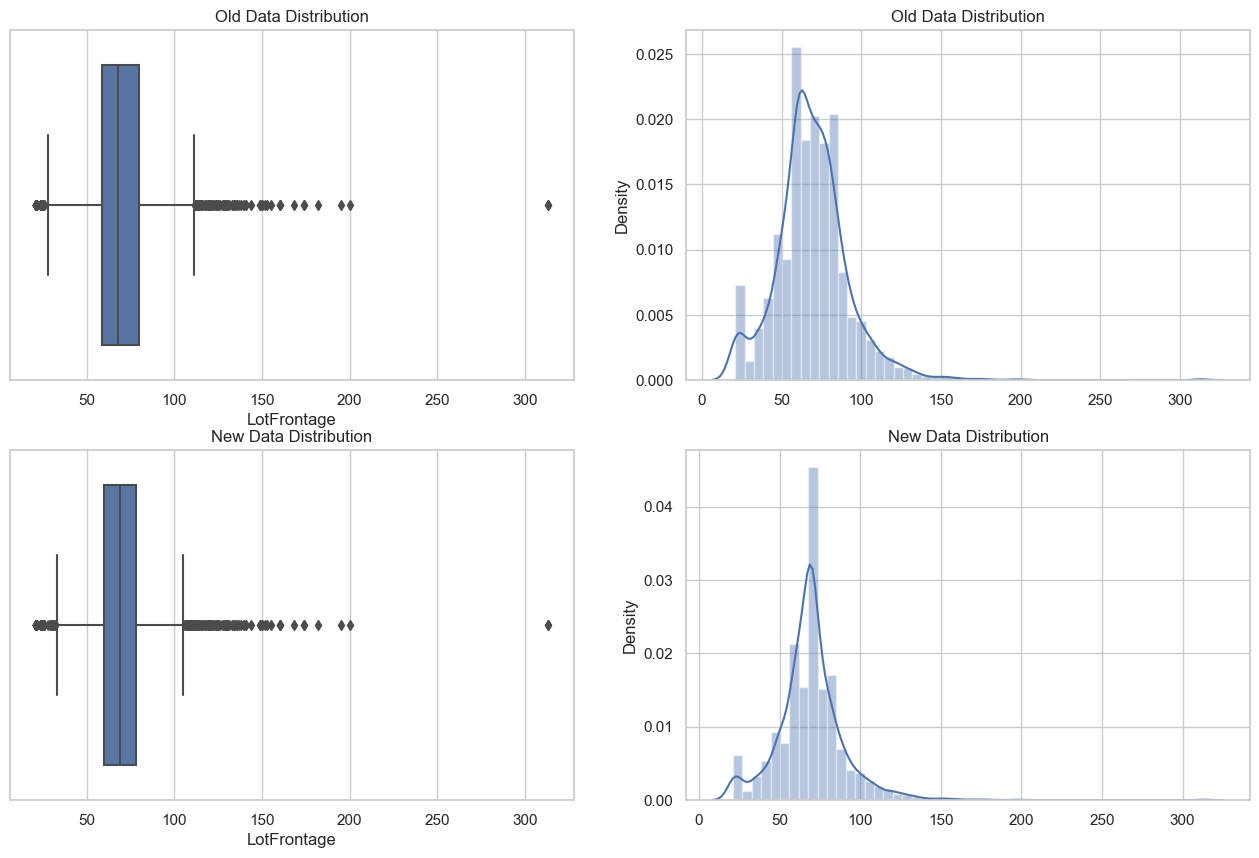

In [40]:
oldNewBoxHistPlot(df, df_manp_data, "LotFrontage")

#### 4. Utilities    = 0.068517

In [41]:
df["Utilities"].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [42]:
utilities_mode = df["Utilities"].mode()[0]
df_manp_data["Utilities"].replace(np.nan, utilities_mode, inplace=True)
df_manp_data["Utilities"].isnull().sum()

0

#### 5. Exterior1st   =   0.034258  and Exterior2nd    =  0.034258

In [43]:
exterior1st_mode = df["Exterior1st"].mode()[0]
exterior2nd_mode = df["Exterior2nd"].mode()[0]
df_manp_data["Exterior1st"].replace(np.nan, utilities_mode, inplace=True)
print("Exterior1st NULL values =", df_manp_data["Exterior1st"].isnull().sum())
df_manp_data["Exterior2nd"].replace(np.nan, utilities_mode, inplace=True)
print("Exterior2nd NULL values =", df_manp_data["Exterior2nd"].isnull().sum())

Exterior1st NULL values = 0
Exterior2nd NULL values = 0


#### 6. MasVnrType    =   0.822199    and  MasVnrArea  =     0.787941

<Axes: ylabel='Id'>

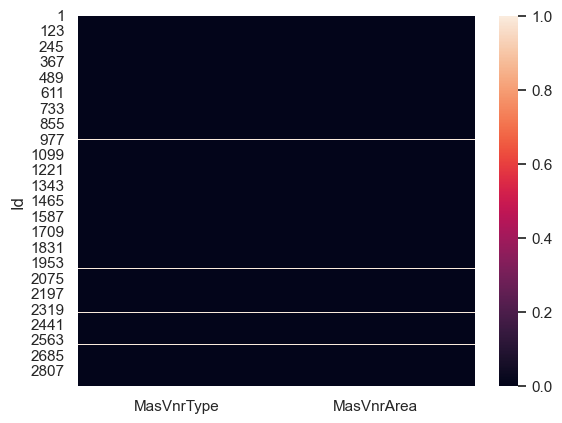

In [44]:
sns.heatmap(df[["MasVnrType", "MasVnrArea"]].isnull())

In [45]:
df["MasVnrType"].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [46]:
# As None is present in set of categorical data we use mode value
masvnrtype_mode = df["MasVnrType"].mode()[0]
df_manp_data["MasVnrType"].replace(np.nan, masvnrtype_mode, inplace=True)
df_manp_data["MasVnrType"].isnull().sum()

0

C:\Users\Sunil Magare\AppData\Local\Temp\ipykernel_19204\3158052552.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df)


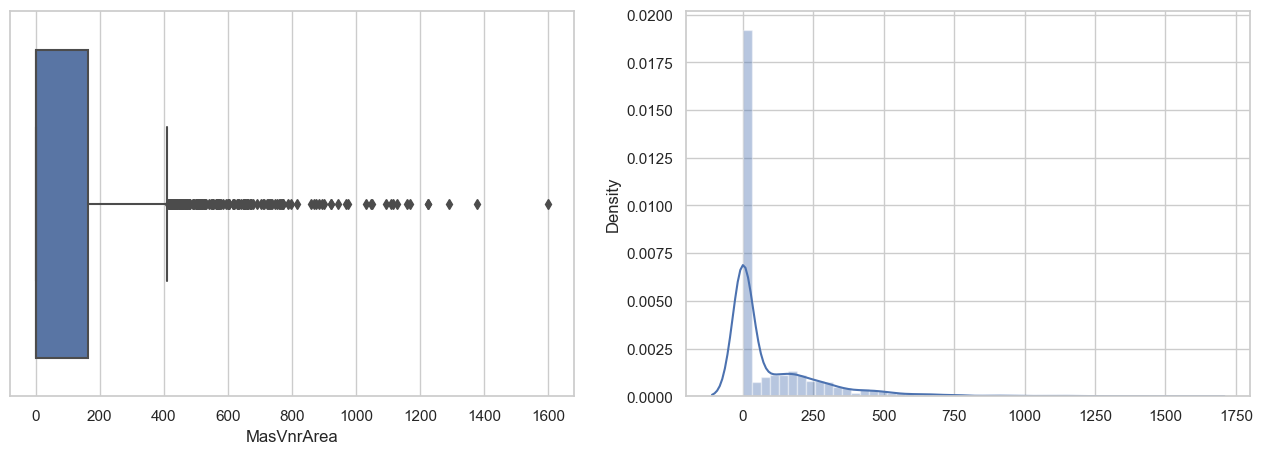

In [47]:
boxHistPlot(df["MasVnrArea"])

In [48]:
# As most of the value is `0` we shall use zero to replace the same
masvnrarea_val = 0
df_manp_data["MasVnrArea"].replace(np.nan, masvnrarea_val, inplace=True)
df_manp_data["MasVnrArea"].isnull().sum()

0

#### 7. Basement feature

In [49]:
cat_bsmt_feat = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]
num_bsmt_feat = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath"]

<Axes: ylabel='Id'>

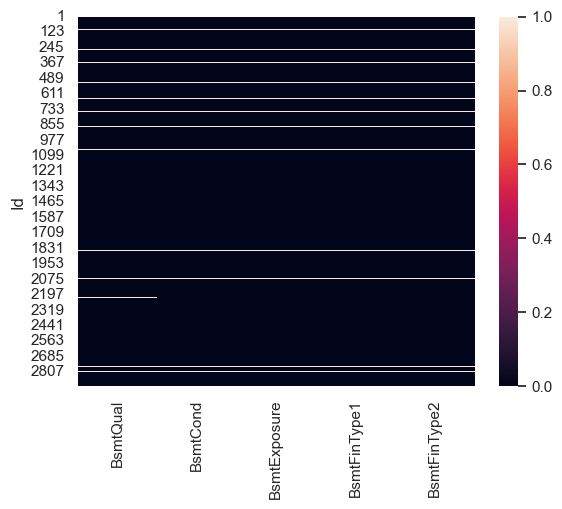

In [50]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [51]:
for feat in cat_bsmt_feat:
    print(f"Value count of {feat}: {df[feat].value_counts()}")

Value count of BsmtQual: TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
Value count of BsmtCond: TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
Value count of BsmtExposure: No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
Value count of BsmtFinType1: Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
Value count of BsmtFinType2: Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [52]:
bsmt_cont = "NA"
for feat in cat_bsmt_feat:
    df_manp_data[feat].replace(np.nan, bsmt_cont, inplace=True)

In [53]:
df_manp_data[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [54]:
df_bsmt = df[cat_bsmt_feat + num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis = 1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
260,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
333,Gd,TA,No,GLQ,NaN,1124.0,479.0,1603.0,3206.0,1.0,0.0
343,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
bsmt_val = 0
for feat in num_bsmt_feat:
    df_manp_data[feat].replace(np.nan, bsmt_val, inplace=True)

In [56]:
df_manp_data[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

#### 8. Electrical    =   0.034258 and KitchenQual   =   0.034258

In [57]:
df["Electrical"].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [58]:
df["KitchenQual"].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [59]:
df_ekk = df[["Electrical", "KitchenQual", "KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


In [60]:
electrical_mode = df["Electrical"].mode()[0]
df_manp_data["Electrical"].replace(np.nan, electrical_mode, inplace=True)
df_manp_data["Electrical"].isnull().sum()

0

In [61]:
kitchenqual_mode = df["KitchenQual"].mode()[0]
df_manp_data["KitchenQual"].replace(np.nan, kitchenqual_mode, inplace=True)
df_manp_data["KitchenQual"].isnull().sum()

0

#### 9. 
#### Functional   =   0.068517
#### FireplaceQu  =   48.646797
#### PoolQC       =   99.657417
#### Fence        =   80.43856
#### MiscFeature  =   96.402878
#### SaleType     =   0.034258

In [62]:
remaining_cat_features = ["Functional", "FireplaceQu","PoolQC","Fence","MiscFeature","SaleType"]

In [63]:
for feat in remaining_cat_features:
    print(f"Value count of {feat}: {df[feat].value_counts()}")

Value count of Functional: Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
Value count of FireplaceQu: Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64
Value count of PoolQC: Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64
Value count of Fence: MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64
Value count of MiscFeature: Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64
Value count of SaleType: WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64


In [64]:
saletype_mode = df["SaleType"].mode()[0]
df_manp_data["SaleType"].replace(np.nan, saletype_mode, inplace=True)
df_manp_data["SaleType"].isnull().sum()

0

In [65]:
functional_mode = df["Functional"].mode()[0]
df_manp_data["Functional"].replace(np.nan, functional_mode, inplace=True)
df_manp_data["Functional"].isnull().sum()

0

In [66]:
fireplacequ_const = "NA"
df_manp_data["FireplaceQu"].replace(np.nan, fireplacequ_const, inplace=True)
df_manp_data["FireplaceQu"].isnull().sum()

0

In [67]:
poolqc_const = "NA"
df_manp_data["PoolQC"].replace(np.nan, poolqc_const, inplace=True)
df_manp_data["PoolQC"].isnull().sum()

0

In [68]:
fence_const = "NA"
df_manp_data["Fence"].replace(np.nan, fence_const, inplace=True)
df_manp_data["Fence"].isnull().sum()

0

In [69]:
miscfeature_const = "NA"
df_manp_data["MiscFeature"].replace(np.nan, miscfeature_const, inplace=True)
df_manp_data["MiscFeature"].isnull().sum()

0

#### 10. 
#### GarageType      = 5.378554
#### GarageFinish    = 5.447071
#### GarageQual      = 5.447071
#### GarageCond      = 5.447071

#### GarageYrBlt     = 5.447071
#### GarageCars      = 0.034258
#### GarageArea      = 0.034258

In [70]:
cat_garage_feat = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"] 
num_garage_feat = ["GarageYrBlt", "GarageCars", "GarageArea"]

df_garafe = df[num_garage_feat+cat_garage_feat]
df_garafe[df_garafe.isnull().any(axis=1)]

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
Id,,,,,,,
40,NaN,0.0,0.0,NaN,NaN,NaN,NaN
49,NaN,0.0,0.0,NaN,NaN,NaN,NaN
79,NaN,0.0,0.0,NaN,NaN,NaN,NaN
89,NaN,0.0,0.0,NaN,NaN,NaN,NaN
90,NaN,0.0,0.0,NaN,NaN,NaN,NaN
100,NaN,0.0,0.0,NaN,NaN,NaN,NaN
109,NaN,0.0,0.0,NaN,NaN,NaN,NaN
126,NaN,0.0,0.0,NaN,NaN,NaN,NaN
128,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [71]:
for feat in cat_garage_feat:
    print(f"Value count of {feat}: {df[feat].value_counts()}")

Value count of GarageType: Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64
Value count of GarageFinish: Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64
Value count of GarageQual: TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64
Value count of GarageCond: TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64


In [72]:
feature_const = "NA"
for feat in cat_garage_feat:
    df_manp_data[feat].replace(np.nan, feature_const, inplace=True)
df_manp_data[cat_garage_feat].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [73]:
feature_val = 0
for feat in num_garage_feat:
    df_manp_data[feat].replace(np.nan, feature_val, inplace=True)
df_manp_data[num_garage_feat].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [74]:
df_manp_data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

## Feature Transformation
### Converting Numerical Data to Categorical Data

In [75]:
for_numerical_to_categorical = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]

In [76]:
for feat in for_numerical_to_categorical:
    print(f"Value count of {feat}: {df_manp_data[feat].dtype}")

Value count of MSSubClass: int64
Value count of YearBuilt: int64
Value count of YearRemodAdd: int64
Value count of GarageYrBlt: float64
Value count of MoSold: int64
Value count of YrSold: int64


In [77]:
df_manp_data[for_numerical_to_categorical].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [78]:
df_manp_data["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [79]:
calendar.month_abbr[2]

'Feb'

In [80]:
df_manp_data["MoSold"] = df_manp_data["MoSold"].apply(lambda x: calendar.month_abbr[x])
df_manp_data["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [81]:
for feat in for_numerical_to_categorical:
    df_manp_data[feat] = df_manp_data[feat].astype(str)

In [82]:
for feat in for_numerical_to_categorical:
    print(f"Value count of {feat}: {df_manp_data[feat].dtype}")

Value count of MSSubClass: object
Value count of YearBuilt: object
Value count of YearRemodAdd: object
Value count of GarageYrBlt: object
Value count of MoSold: object
Value count of YrSold: object


## Converting Categorical Data into Numerical Data
### Ordinal Encoding

In [83]:
ordinal_end_var = [
"ExterQual",
"ExterCond",
"BsmtQual",
"BsmtCond",
"Bsmt Exposure",
"BsmtFinType1",
"BsmtFinSF1",
"BsmtFinType2",
"HeatingQC",
"KitchenQual",
"FireplaceQu",
"GarageQual",
"GarageCond",
"PoolQC",
"Functional",
"GarageFinish",
"PavedDrive",
"Utilities"]
print("Total number of features to convert ordinal to numerical format:", len(ordinal_end_var))

Total number of features to convert ordinal to numerical format: 18


In [84]:
df_manp_data["ExterQual"].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [85]:
ordered_categories = ["Po", "Fa", "TA", "Gd", "Ex"]
df_manp_data["ExterQual"] = df_manp_data["ExterQual"].astype(CategoricalDtype(categories=ordered_categories, ordered=True))
ordinal_encoded = df_manp_data["ExterQual"].cat.codes

In [86]:
df_manp_data["ExterQual"] = ordinal_encoded
df_manp_data["ExterQual"].value_counts()

2    1798
3     979
4     107
1      35
Name: ExterQual, dtype: int64

In [87]:
df_manp_data["BsmtExposure"].value_counts()

No    1904
Av     418
Gd     276
Mn     239
NA      82
Name: BsmtExposure, dtype: int64

In [88]:
ordered_categories = ["NA", "No", "Mn", "Av", "Gd"]
df_manp_data["BsmtExposure"] = df_manp_data["BsmtExposure"].astype(CategoricalDtype(categories=ordered_categories, ordered=True))
ordinal_encoded = df_manp_data["BsmtExposure"].cat.codes

In [89]:
df_manp_data["BsmtExposure"] = ordinal_encoded
df_manp_data["BsmtExposure"].value_counts()

1    1904
3     418
4     276
2     239
0      82
Name: BsmtExposure, dtype: int64

In [90]:
ordered_categories = ["Po", "Fa", "TA", "Gd", "Ex"]
df_manp_data["ExterCond"] = df_manp_data["ExterCond"].astype(CategoricalDtype(categories=ordered_categories, ordered=True))
ordinal_encoded = df_manp_data["ExterCond"].cat.codes
df_manp_data["ExterCond"] = ordinal_encoded
df_manp_data["ExterCond"].value_counts()

ordered_categories = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
df_manp_data["BsmtQual"] = df_manp_data["BsmtQual"].astype(CategoricalDtype(categories=ordered_categories, ordered=True))
ordinal_encoded = df_manp_data["BsmtQual"].cat.codes
df_manp_data["BsmtQual"] = ordinal_encoded
df_manp_data["BsmtQual"].value_counts()

ordered_categories = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
df_manp_data["BsmtCond"] = df_manp_data["BsmtCond"].astype(CategoricalDtype(categories=ordered_categories, ordered=True))
ordinal_encoded = df_manp_data["BsmtCond"].cat.codes
df_manp_data["BsmtCond"] = ordinal_encoded
df_manp_data["BsmtCond"].value_counts()

ordered_categories = ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
df_manp_data["BsmtFinType1"] = df_manp_data["BsmtFinType1"].astype(CategoricalDtype(categories=ordered_categories, ordered=True))
ordinal_encoded = df_manp_data["BsmtFinType1"].cat.codes
df_manp_data["BsmtFinType1"] = ordinal_encoded
df_manp_data["BsmtFinType1"].value_counts()

ordered_categories = ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
df_manp_data["BsmtFinType2"] = df_manp_data["BsmtFinType2"].astype(CategoricalDtype(categories=ordered_categories, ordered=True))
ordinal_encoded = df_manp_data["BsmtFinType2"].cat.codes
df_manp_data["BsmtFinType2"] = ordinal_encoded
df_manp_data["BsmtFinType2"].value_counts()

ordered_categories = ["Po", "Fa", "TA", "Gd", "Ex"]
df_manp_data["HeatingQC"] = df_manp_data["HeatingQC"].astype(CategoricalDtype(categories=ordered_categories, ordered=True))
ordinal_encoded = df_manp_data["HeatingQC"].cat.codes
df_manp_data["HeatingQC"] = ordinal_encoded
df_manp_data["HeatingQC"].value_counts()

ordered_categories = ["Po", "Fa", "TA", "Gd", "Ex"]
df_manp_data["KitchenQual"] = df_manp_data["KitchenQual"].astype(CategoricalDtype(categories=ordered_categories, ordered=True))
ordinal_encoded = df_manp_data["KitchenQual"].cat.codes
df_manp_data["KitchenQual"] = ordinal_encoded
df_manp_data["KitchenQual"].value_counts()

ordered_categories = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
df_manp_data["FireplaceQu"] = df_manp_data["FireplaceQu"].astype(CategoricalDtype(categories=ordered_categories, ordered=True))
ordinal_encoded = df_manp_data["FireplaceQu"].cat.codes
df_manp_data["FireplaceQu"] = ordinal_encoded
df_manp_data["FireplaceQu"].value_counts()

ordered_categories = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
df_manp_data["GarageQual"] = df_manp_data["GarageQual"].astype(CategoricalDtype(categories=ordered_categories, ordered=True))
ordinal_encoded = df_manp_data["GarageQual"].cat.codes
df_manp_data["GarageQual"] = ordinal_encoded
df_manp_data["GarageQual"].value_counts()

ordered_categories = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
df_manp_data["GarageCond"] = df_manp_data["GarageCond"].astype(CategoricalDtype(categories=ordered_categories, ordered=True))
ordinal_encoded = df_manp_data["GarageCond"].cat.codes
df_manp_data["GarageCond"] = ordinal_encoded
df_manp_data["GarageCond"].value_counts()

ordered_categories = ["NA", "Fa", "TA", "Gd", "Ex"]
df_manp_data["PoolQC"] = df_manp_data["PoolQC"].astype(CategoricalDtype(categories=ordered_categories, ordered=True))
ordinal_encoded = df_manp_data["PoolQC"].cat.codes
df_manp_data["PoolQC"] = ordinal_encoded
df_manp_data["PoolQC"].value_counts()

ordered_categories = ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"]
df_manp_data["Functional"] = df_manp_data["Functional"].astype(CategoricalDtype(categories=ordered_categories, ordered=True))
ordinal_encoded = df_manp_data["Functional"].cat.codes
df_manp_data["Functional"] = ordinal_encoded
df_manp_data["Functional"].value_counts()

ordered_categories = ["NA", "Unf", "RFn", "Fin"]
df_manp_data["GarageFinish"] = df_manp_data["GarageFinish"].astype(CategoricalDtype(categories=ordered_categories, ordered=True))
ordinal_encoded = df_manp_data["GarageFinish"].cat.codes
df_manp_data["GarageFinish"] = ordinal_encoded
df_manp_data["GarageFinish"].value_counts()

ordered_categories = ["Y", "P", "N"]
df_manp_data["PavedDrive"] = df_manp_data["PavedDrive"].astype(CategoricalDtype(categories=ordered_categories, ordered=True))
ordinal_encoded = df_manp_data["PavedDrive"].cat.codes
df_manp_data["PavedDrive"] = ordinal_encoded
df_manp_data["PavedDrive"].value_counts()



0    2641
2     216
1      62
Name: PavedDrive, dtype: int64

In [91]:
df_manp_data["ExterCond"].value_counts()

2    2538
3     299
1      67
4      12
0       3
Name: ExterCond, dtype: int64

In [92]:
ordered_categories = ["ELO", "NoSewa", "NoSewr", "AllPub"]
df_manp_data["Utilities"] = df_manp_data["Utilities"].astype(CategoricalDtype(categories=ordered_categories, ordered=True))
ordinal_encoded = df_manp_data["Utilities"].cat.codes
df_manp_data["Utilities"] = ordinal_encoded
df_manp_data["Utilities"].value_counts()

 3    2918
-1       1
Name: Utilities, dtype: int64

In [93]:
df_manp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

## One hot encoding for nominal categorical data

In [94]:
df_encode = df_manp_data.copy()
object_columns = df_encode.select_dtypes(include="object").columns.tolist()

print("Total number of object datatype features:", len(object_columns))
print("Feature List \n:", object_columns)

Total number of object datatype features: 32
Feature List 
: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [95]:
df_encode.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,3,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706.0,1,0.0,150.0,856.0,GasA,4,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,7,0,0,Attchd,2003.0,2,2.0,548.0,3,3,0,0,61,0,0,0,0,0,NA,NA,0,Feb,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,3,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978.0,1,0.0,284.0,1262.0,GasA,4,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,2,6,7,1,3,Attchd,1976.0,2,2.0,460.0,3,3,0,298,0,0,0,0,0,0,NA,NA,0,May,2007,WD,Normal,181500.0


In [96]:
print("Shape before encoding:", df_encode.shape)
df_encode = pd.get_dummies(df_encode, columns=object_columns, prefix=object_columns,drop_first=object_columns)
print("Shape after encoding:", df_encode.shape)

Shape before encoding: (2919, 80)
Shape after encoding: (2919, 515)


## Spliting Data for training and testing

In [97]:
train_len = df_train.shape[0]
train_len

1460

In [98]:
x_train = df_encode[:train_len].drop("SalePrice", axis=1)
y_train = df_encode["SalePrice"][:train_len]
x_test = df_encode[train_len:].drop("SalePrice", axis=1)
print("Shape of x_train data:", x_train.shape)
print("Shape of y_train data:", y_train.shape)
print("Shape of x_test data:", x_test.shape)

Shape of x_train data: (1460, 514)
Shape of y_train data: (1460,)
Shape of x_test data: (1459, 514)


## Feature Scaling

In [99]:
sc = StandardScaler()
sc.fit(x_train)
# formula z = (x-u)/s

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [100]:
x_train[:3,:]

array([[-0.22335706, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [101]:
x_test[:3,:]

array([[ 0.45789401,  0.11076257,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.50331075,  0.37584985,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.18539358,  0.33205282,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [102]:
### Carry forword for deployment
#sc.mean_
#sc.n features_in_
#sc.n_samples_seen_
#sc.scale
#sc.var
#sc.with mean
#sc.with std

In [103]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [104]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.isotonic import IsotonicRegression

In [107]:
svr = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()
mlpr = MLPRegressor()
ir = IsotonicRegression()

In [114]:
models = {"a": ["LinearRegression", lr],
"b": ["SVR", svr],
"c": ["SGDRegressor", sgdr],
"d": ["KNeighbors Regressor", knr],
"e": ["Gaussian ProcessRegressor", gpr],
"f":["Decision TreeRegressor", dtr],
"g": ["GradientBoostingRegressor", gbr],
"h":["Random Forest Regressor", rfr],
"i": ["XGBRegressor", xgbr],
"j": ["MLPRegressor", mlpr]
}

In [115]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score
def test_model (model, x_train=x_train, y_train=y_train):
    cv = KFold(n_splits = 7, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score (model, x_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [116]:
models_score = []
for model in models:
    print("Training model: ", models[model][0])
    score = test_model(models[model][1], x_train, y_train)
    print("Score of model", score)
    models_score.append([models[model][0], score[0]])

Training model:  LinearRegression
Score of model [-9.419589709617292e+23]
Training model:  SVR
Score of model [-0.05213245856724234]
Training model:  SGDRegressor
Score of model [-2575.358495107427]
Training model:  KNeighbors Regressor
Score of model [0.5599081755806364]
Training model:  Gaussian ProcessRegressor
Score of model [-5.398916312612151]
Training model:  Decision TreeRegressor
Score of model [0.6638730847539943]
Training model:  GradientBoostingRegressor
Score of model [0.8769120021609451]
Training model:  Random Forest Regressor
Score of model [0.8395898208541566]
Training model:  XGBRegressor
Score of model [0.8583324659811422]
Training model:  MLPRegressor


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Score of model [-4.829806368817903]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [119]:
models_score

[['LinearRegression', -9.419589709617292e+23],
 ['SVR', -0.05213245856724234],
 ['SGDRegressor', -2575.358495107427],
 ['KNeighbors Regressor', 0.5599081755806364],
 ['Gaussian ProcessRegressor', -5.398916312612151],
 ['Decision TreeRegressor', 0.6638730847539943],
 ['GradientBoostingRegressor', 0.8769120021609451],
 ['Random Forest Regressor', 0.8395898208541566],
 ['XGBRegressor', 0.8583324659811422],
 ['MLPRegressor', -4.829806368817903]]

In [ ]:
models_score